In [67]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# for display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  #default 'last_expr'

## Uni-variate distribution
### Goal 
The goal here is to choose robust statistics for both arrays so that the numbers come very close to each other, as it should be.

In [77]:
x_norm    = np.random.randn(2000)        # standard normal
x_outlier = np.append(x_norm, [999])     # add one outlier

### Central Tendancy 

Mean, Median and Trimmed Mean <br>
The mean is sensitive to the outlier.

In [78]:
from scipy import stats

np.round([np.mean(x_norm),   np.mean(x_outlier)],   3)
np.round([np.median(x_norm), np.median(x_outlier)], 3), "Median is the winner!"
np.round([stats.trim_mean(x_norm, 0.01), stats.trim_mean(x_outlier, 0.01)],  3), "Trimmed mean also works here!"

array([-0.018,  0.482])

(array([0.003, 0.003]), 'Median is the winner!')

(array([-0.017, -0.015]), 'Trimmed mean also works here!')

### Dispersion

Standard Deviation, Mean Absolute Deviation from the Mean (mad), and **Median** Absolute Deviation from the **Median** (MAD). The former two are still susceptible to outliers because mean is involved. The last (MAD) uses median, so it's much more robust to the outlier. <br>
Note: "mad" and "MAD" here are quite different from each other!

In [57]:
np.round([np.std(x_norm), np.std(x_outlier)],3), "really bad"
np.round([pd.Series(x_norm).mad(), pd.Series(x_outlier).mad()],3), "better, but still not good enough"

(array([ 0.99 , 22.349]), 'really bad')

(array([0.788, 1.386]), 'better, but still not good enough')

Scipy 1.13.0 and later supports median_absolute_deviation( ). Mine is not that new. So let's go MAD( ) on our own!

In [47]:
def MAD(arr):
    # find median
    median = np.median(arr)
    # calculate absolute deviations
    deviations = np.absolute(arr - median)
    # find the median of the deviations
    mad = np.median(deviations)
    scale = 1./ np.quantile(arr, 0.75) # the scale is used to ensure comparability of MAD with std.
    return mad*scale

np.round([MAD(x_norm), MAD(x_outlier)], 3)

array([0.988, 0.986])

Trimmed standard deviation also works.

In [65]:
np.round([stats.tstd(x_norm), stats.tstd(x_outlier, [-100,100])],3)

array([0.99, 0.99])

In [84]:
np.quantile(x_norm, [0, 0.25, 0.75, 1])

array([-3.584, -0.632,  0.643,  3.319])

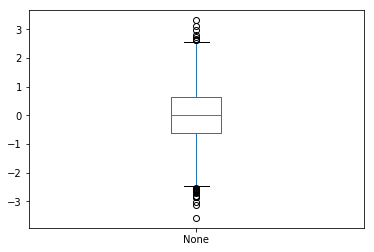

In [80]:
pd.Series(x_norm).plot.box()